In [1]:
# %%
import re
import keras
import pathlib
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras import layers
from keras import models
from keras.utils import plot_model
from keras.models import load_model
from keras.models import Sequential
from keras.preprocessing.image import img_to_array, load_img
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.callbacks import EarlyStopping, TensorBoard, ModelCheckpoint
from keras.layers.convolutional import Conv2D, MaxPooling2D, SeparableConv2D

Using TensorFlow backend.


In [2]:
# %%
num_classes = 32
height, width, channels = 32, 32, 3
using_img_num = 1000
dent = [
    11, 12, 13, 14, 15, 16, 17, 18,
    21, 22, 23, 24, 25, 26, 27, 28,
    31, 32, 33, 34, 35, 36, 37, 38,
    41, 42, 43, 44, 45, 46, 47, 48
    ]
data_path = '/Users/seino/Documents/research/DeepLearning/playground/multiclass_multilabel_5/32'
data_obj = pathlib.Path(data_path)
all_img = list(data_obj.glob('*.png'))
using_img = random.sample(all_img, using_img_num)
x = []
y = []
for each_img in using_img:
    # 画像を数値に変換
    x_img = load_img(each_img)
    x_array = img_to_array(x_img)
    x.append(x_array)
    # ファイル名をラベルに変換
    fname = each_img.name
    fname = re.sub('.*-', '', fname)
    fname = fname.strip('.png')
    fname = fname.split(',')
    fname = [int(k) for k in fname]
    teeth = [0]*32
    for i in fname:
        indx = dent.index(i)
        teeth[indx] = 1
    y.append(teeth)
# xとyが出揃ってから処理すべきもの
x = np.asarray(x)
x = x.astype('float32')
x = x/255.0
y = np.asarray(y)
# 訓練ファイルと検証ファイルを分割
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [5]:
# %%
height, width, channels = 32, 32, 3
hidden_units = 4  # 1 is baseline
input_param = 32  # 32 is baseline
dropout_rate = 0.4  # 0.1 is baseline
batch_p = 60  # 100 is baseline
epoch_p = 50  # 10 is baseline
model = models.Sequential()
model.add(layers.SeparableConv2D(
    input_param, 3, activation='relu',
    input_shape=(height, width, channels)))
model.add(layers.SeparableConv2D(input_param*2, 3, activation='relu'))
model.add(layers.MaxPooling2D(2))
model.add(layers.Dropout(dropout_rate))
model.add(layers.MaxPooling2D(2))
model.add(layers.SeparableConv2D(input_param*2, 3, activation='relu'))
model.add(layers.SeparableConv2D(input_param*4, 3, activation='relu'))
model.add(layers.Dropout(dropout_rate))
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(input_param*2, activation='relu'))
model.add(layers.Dense(num_classes, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()
model_arch_name = 'R' + str(input_param) + '-H' + str(hidden_units) + '-D'\
    + str(int(dropout_rate*100)) + '-B' + str(batch_p) + '-E' + str(epoch_p)
plot_model(model, show_shapes=True, to_file='./'+model_arch_name+'.png')

W0924 14:39:11.245496 4591400384 deprecation_wrapper.py:119] From /Users/seino/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:131: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0924 14:39:11.258543 4591400384 deprecation.py:506] From /Users/seino/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
W0924 14:39:11.659076 4591400384 deprecation.py:323] From /Users/seino/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast r

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
separable_conv2d_1 (Separabl (None, 30, 30, 32)        155       
_________________________________________________________________
separable_conv2d_2 (Separabl (None, 28, 28, 64)        2400      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
separable_conv2d_3 (Separabl (None, 5, 5, 64)          4736      
_________________________________________________________________
separable_conv2d_4 (Separabl (None, 3, 3, 128)         8896      
__________

W0924 14:39:32.863621 4591400384 deprecation_wrapper.py:119] From /Users/seino/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W0924 14:39:32.876513 4591400384 deprecation_wrapper.py:119] From /Users/seino/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:973: The name tf.assign is deprecated. Please use tf.compat.v1.assign instead.

W0924 14:39:33.239872 4591400384 deprecation_wrapper.py:119] From /Users/seino/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:2741: The name tf.Session is deprecated. Please use tf.compat.v1.Session instead.

W0924 14:39:33.250580 4591400384 deprecation_wrapper.py:119] From /Users/seino/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.



Train on 700 samples, validate on 300 samples
Epoch 1/50
700/700 [==============================] - 3s 4ms/step - loss: 0.6845 - acc: 0.6473 - val_loss: 0.6630 - val_acc: 0.6754
Epoch 2/50
700/700 [==============================] - 1s 2ms/step - loss: 0.6381 - acc: 0.6670 - val_loss: 0.6160 - val_acc: 0.6967
Epoch 3/50
700/700 [==============================] - 1s 2ms/step - loss: 0.6191 - acc: 0.6802 - val_loss: 0.6124 - val_acc: 0.6967
Epoch 4/50
700/700 [==============================] - 1s 2ms/step - loss: 0.6123 - acc: 0.6802 - val_loss: 0.6074 - val_acc: 0.6967
Epoch 5/50
700/700 [==============================] - 1s 2ms/step - loss: 0.6099 - acc: 0.6802 - val_loss: 0.6070 - val_acc: 0.6967
Epoch 6/50
700/700 [==============================] - 1s 2ms/step - loss: 0.6070 - acc: 0.6802 - val_loss: 0.6072 - val_acc: 0.6967
Epoch 7/50
700/700 [==============================] - 1s 1ms/step - loss: 0.6031 - acc: 0.6802 - val_loss: 0.6023 - val_acc: 0.6967
Epoch 8/50
700/700 [==========

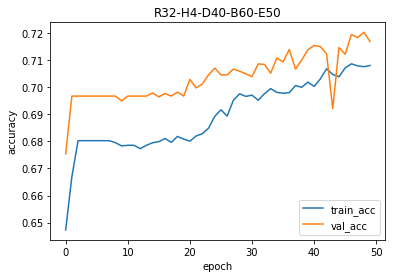

In [6]:
history = model.fit(
    x_train, y_train,
    batch_size=batch_p,
    epochs=epoch_p,
    validation_data=(x_test, y_test),
    verbose=1)
model.save('./'+model_arch_name+'.h5')
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title(model_arch_name)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train_acc', 'val_acc'], loc='lower right')
plt.savefig('./acc_'+model_arch_name+'.png')
plt.show()

In [ ]:
jpg_name = 'F64ULG-15,17,22,31,34,36,37,43,46,47'
model_file_name = 'R32-H4-D40-B60-E50.h5'

In [ ]:
model = load_model('/Users/seino/Documents/research/DeepLearning/playground/\
    multiclass_multilabel_5/log/R32-H4-D40-B60-E50.h5')

In [ ]:
img_path = ('/Users/seino/Documents/research/DeepLearning/playground/img/32/\
    F32ULG-15,25,34,35,37,43,44,47.png')
img = img_to_array(load_img(img_path, target_size=(32, 32)))
img_nad = img_to_array(img)/255
img_nad = img_nad[None, ...]

In [ ]:
label = [
    11, 12, 13, 14, 15, 16, 17, 18,
    21, 22, 23, 24, 25, 26, 27, 28,
    31, 32, 33, 34, 35, 36, 37, 38,
    41, 42, 43, 44, 45, 46, 47, 48
]
pred = model.predict(img_nad, batch_size=1, verbose=0)
score = np.max(pred)
pred_label = label[np.argmax(pred[0])]
print('name:', pred_label)
print('score:', score)
plt.imshow(load_img(img_path))

In [3]:
print(pred_label, type(pred_label))
print(pred, type(pred))
pred_labels = label[np.argsort(pred)]
print(pred_labels, type(pred_labels))

47 <class 'int'>
[[1.7654300e-03 1.0549575e-02 3.4627914e-03 1.5094191e-02 9.8544943e-01
  2.7576089e-04 7.9184771e-05 0.0000000e+00 2.1110773e-03 7.0286691e-03
  7.2989225e-02 2.4187297e-02 7.7680504e-01 3.9176643e-03 4.2974949e-05
  0.0000000e+00 5.9298575e-02 8.1648856e-02 3.4846902e-01 6.9484520e-01
  6.9044673e-01 5.3427786e-02 9.7522461e-01 0.0000000e+00 2.5434732e-02
  2.5879094e-01 7.6188505e-01 6.7224103e-01 4.4277033e-01 3.4090281e-03
  9.9993801e-01 0.0000000e+00]] <class 'numpy.ndarray'>


TypeError: only integer scalar arrays can be converted to a scalar index